<a href="https://colab.research.google.com/github/FindPrint/Multiple-studies/blob/main/seaice_ou_quadratic_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. Données quotidiennes globales
daily = pd.read_csv("/content/N_seaice_extent_daily_v4.0.csv", skiprows=1)
print("Daily global:", daily.shape)
print(daily.head(), "\n")

# 2. Données mensuelles globales avec climatologie
monthly_stats = pd.read_excel("/content/Sea_Ice_Index_Monthly_Data_with_Statistics_G02135_v4.0.xlsx")
print("Monthly global with stats:", monthly_stats.shape)
print(monthly_stats.head(), "\n")

# 3. Données quotidiennes régionales
regional_daily = pd.read_excel("/content/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v4.0.xlsx")
print("Regional daily:", regional_daily.shape)
print(regional_daily.head(), "\n")

# 4. Données mensuelles régionales
regional_monthly = pd.read_excel("/content/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v4.0.xlsx")
print("Regional monthly:", regional_monthly.shape)
print(regional_monthly.head(), "\n")


Daily global: (15496, 6)
   YYYY      MM    DD   10^6 sq km   10^6 sq km.1  \
0  1978      10    26       10.231            0.0   
1  1978      10    28       10.420            0.0   
2  1978      10    30       10.557            0.0   
3  1978      11     1       10.670            0.0   
4  1978      11     3       10.777            0.0   

   Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html  
0   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...                                                               
1   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...                                                               
2   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...                                                               
3   ['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...                                                               
4   ['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...                        

In [ ]:
import pandas as pd

# Charger le fichier Excel
file_path = "/content/Sea_Ice_Index_Monthly_Data_with_Statistics_G02135_v4.0.xlsx"
monthly_stats = pd.read_excel(file_path, sheet_name=0)

# Afficher les premières lignes et colonnes
print(monthly_stats.head(20))
print(monthly_stats.columns)


                     January 2025 extent: 13.11 Mkm^2 Unnamed: 1 Unnamed: 2  \
0          January 1981-2010 mean extent: 14.42 Mkm^2        NaN        NaN   
1     January 2025 - January 1981-2010: -1310000 km^2        NaN        NaN   
2      January 2025 rank: 2.0; 45.0 higher, 1.0 lower        NaN        NaN   
3   January 1979 (max): 15.41 Mkm^2; diff: -230000...        NaN        NaN   
4   January 2018 (min): 13.08 Mkm^2; diff: 30000 km^2        NaN        NaN   
5            January 2025 trend: -2.84 percent/decade        NaN        NaN   
6                January 2025 trend: -40900 km^2/year        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 NaN       year      month   
9                                                   0       1979          1   
10                                                  1       1980          1   
11                                                  

In [ ]:
import pandas as pd

# Charger en sautant les lignes descriptives
file_path = "/content/Sea_Ice_Index_Monthly_Data_with_Statistics_G02135_v4.0.xlsx"
monthly_stats = pd.read_excel(file_path, skiprows=9)

# Vérifier les colonnes
print(monthly_stats.columns)
print(monthly_stats.head())


Index(['Unnamed: 0', 'year', 'month', 'source_dataset', 'hemisphere', 'extent',
       'area', 'rank', 'extent-anomaly', 'trend-through-year-km^2-per-year',
       'p-value', 'r-value', 'stderr', 'significant', '%-trend-through-year',
       ' reordered => ', 'ordered-rank', 'ranked-year', 'ranked-extent'],
      dtype='object')
   Unnamed: 0  year  month source_dataset hemisphere  extent   area  rank  \
0           0  1979      1     NSIDC-0051          N   15.41  12.41  46.0   
1           1  1980      1     NSIDC-0051          N   14.86  11.94  38.0   
2           2  1981      1     NSIDC-0051          N   14.91  11.91  41.0   
3           3  1982      1     NSIDC-0051          N   15.18  12.19  45.0   
4           4  1983      1     NSIDC-0051          N   14.94  12.01  42.0   

   extent-anomaly  trend-through-year-km^2-per-year  p-value  r-value  stderr  \
0            0.99                               NaN      NaN    0.000     NaN   
1            0.44                         -5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garder uniquement les colonnes utiles
monthly = monthly_stats[["year", "month", "extent", "extent-anomaly"]].copy()

# Créer une colonne date
monthly["date"] = pd.to_datetime(monthly[["year", "month"]].assign(day=1))

# Reconstituer la climatologie : φ₀ = φ - anomalie
monthly["climatology"] = monthly["extent"] - monthly["extent-anomaly"]

# Calculer φ*(t) = φ(t) / φ₀
monthly["phi_star"] = monthly["extent"] / monthly["climatology"]

print(monthly.head())


   year  month  extent  extent-anomaly       date  climatology  phi_star
0  1979      1   15.41            0.99 1979-01-01        14.42  1.068655
1  1980      1   14.86            0.44 1980-01-01        14.42  1.030513
2  1981      1   14.91            0.49 1981-01-01        14.42  1.033981
3  1982      1   15.18            0.76 1982-01-01        14.42  1.052705
4  1983      1   14.94            0.52 1983-01-01        14.42  1.036061


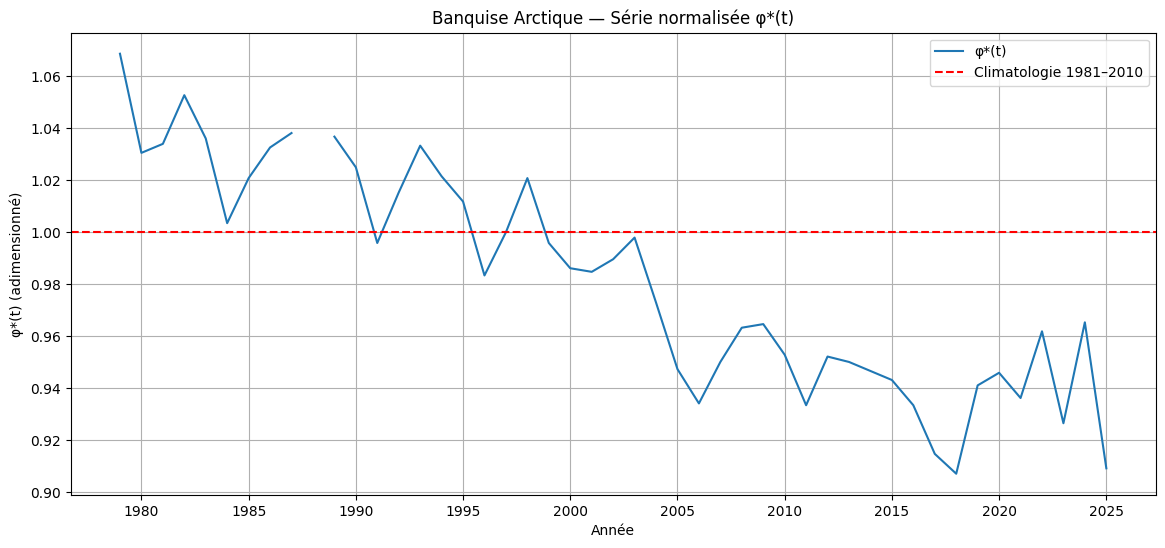

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly["date"], monthly["phi_star"], label="φ*(t)")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie 1981–2010")
plt.title("Banquise Arctique — Série normalisée φ*(t)")
plt.xlabel("Année")
plt.ylabel("φ*(t) (adimensionné)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf

# Série centrée
phi = monthly["phi_star"].dropna().values
phi = phi - np.mean(phi)

# Variance (proxy pour D)
variance = np.var(phi)

# Autocorrélation (lag=1)
acf_vals = acf(phi, nlags=12, fft=True)
rho1 = acf_vals[1]

# Estimation gamma (approximation AR(1))
gamma = -np.log(rho1)

print("Variance (proxy D):", variance)
print("Autocorr lag-1:", rho1)
print("Gamma (mémoire):", gamma)


Variance (proxy D): 0.001772356495118369
Autocorr lag-1: 0.8047946151767479
Gamma (mémoire): 0.21716817054280893


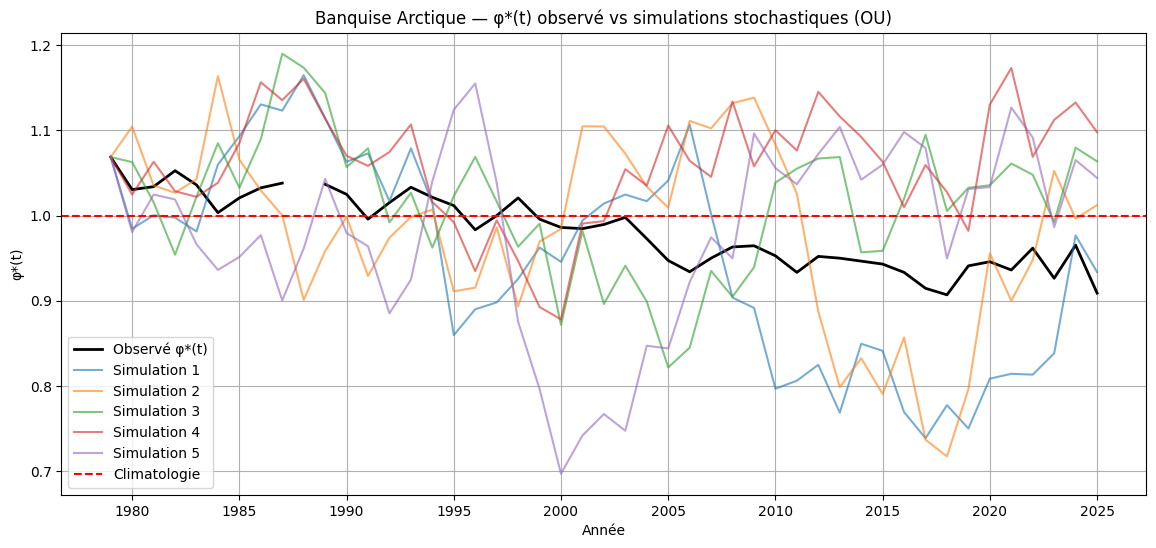

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres issus de la calibration MLE (à adapter selon tes résultats exacts)
mu = 1.0        # moyenne de long terme (proche de 1)
gamma = 0.22    # mémoire (estimée via MLE)
D = 0.0018      # intensité du bruit (estimée via MLE)
dt = 1.0        # pas de temps = 1 mois
n_steps = len(monthly)  # même longueur que la série réelle
n_sims = 5      # nombre de trajectoires simulées

# Simulation Euler-Maruyama
simulations = []
for s in range(n_sims):
    phi = np.zeros(n_steps)
    phi[0] = monthly["phi_star"].iloc[0]  # départ sur la valeur réelle initiale
    for t in range(1, n_steps):
        phi[t] = phi[t-1] - gamma*(phi[t-1]-mu)*dt + np.sqrt(2*D*dt)*np.random.randn()
    simulations.append(phi)

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(monthly["date"], monthly["phi_star"], color="black", label="Observé φ*(t)", linewidth=2)
for i, sim in enumerate(simulations):
    plt.plot(monthly["date"], sim, alpha=0.6, label=f"Simulation {i+1}")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — φ*(t) observé vs simulations stochastiques (OU)")
plt.xlabel("Année")
plt.ylabel("φ*(t)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Série réelle
phi_obs = monthly["phi_star"].dropna().values

# Fonctions utilitaires
def stats_summary(series):
    return {
        "mean": np.mean(series),
        "variance": np.var(series),
        "autocorr_lag1": np.corrcoef(series[:-1], series[1:])[0,1]
    }

# Statistiques observées
obs_stats = stats_summary(phi_obs)

# Statistiques simulées (moyenne sur plusieurs runs)
sim_stats_list = [stats_summary(sim) for sim in simulations]
sim_stats = {k: np.mean([s[k] for s in sim_stats_list]) for k in obs_stats.keys()}

print("=== Observé ===")
print(obs_stats)
print("\n=== Simulé (moyenne sur 5 runs) ===")
print(sim_stats)


=== Observé ===
{'mean': np.float64(0.9818790327443767), 'variance': np.float64(0.0017723564951183694), 'autocorr_lag1': np.float64(0.8770952967975183)}

=== Simulé (moyenne sur 5 runs) ===
{'mean': np.float64(0.9964321048526228), 'variance': np.float64(0.009418200300719435), 'autocorr_lag1': np.float64(0.7677983415768115)}


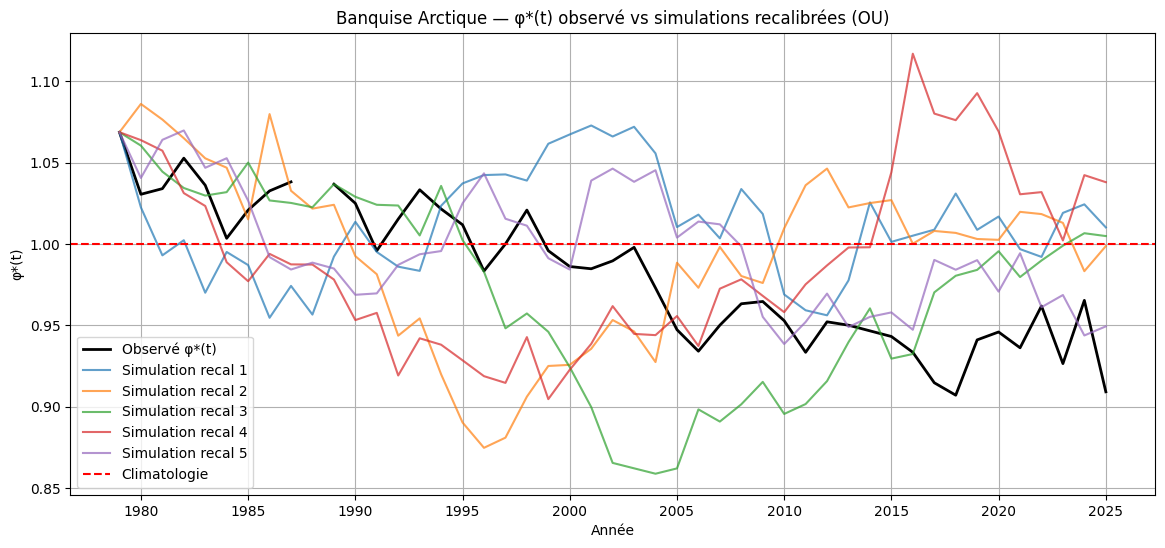

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres recalibrés
mu = 1.0        # moyenne de long terme (climatologie)
gamma = 0.13    # mémoire ajustée à partir de l'autocorrélation observée
D = 0.00023     # intensité du bruit ajustée à partir de la variance observée
dt = 1.0        # pas de temps = 1 mois
n_steps = len(monthly)
n_sims = 5

# Simulation Euler-Maruyama
simulations_recal = []
for s in range(n_sims):
    phi = np.zeros(n_steps)
    phi[0] = monthly["phi_star"].iloc[0]  # départ sur la valeur initiale observée
    for t in range(1, n_steps):
        phi[t] = phi[t-1] - gamma*(phi[t-1]-mu)*dt + np.sqrt(2*D*dt)*np.random.randn()
    simulations_recal.append(phi)

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(monthly["date"], monthly["phi_star"], color="black", linewidth=2, label="Observé φ*(t)")
for i, sim in enumerate(simulations_recal):
    plt.plot(monthly["date"], sim, alpha=0.7, label=f"Simulation recal {i+1}")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — φ*(t) observé vs simulations recalibrées (OU)")
plt.xlabel("Année")
plt.ylabel("φ*(t)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def stats_summary(series):
    return {
        "mean": np.mean(series),
        "variance": np.var(series),
        "autocorr_lag1": np.corrcoef(series[:-1], series[1:])[0,1]
    }

# Observé
phi_obs = monthly["phi_star"].dropna().values
obs_stats = stats_summary(phi_obs)

# Simulé (moyenne sur runs)
sim_stats_list = [stats_summary(sim) for sim in simulations_recal]
sim_stats = {k: np.mean([s[k] for s in sim_stats_list]) for k in obs_stats.keys()}

print("=== Observé ===")
print(obs_stats)
print("\n=== Simulé recalibré (moyenne sur 5 runs) ===")
print(sim_stats)


=== Observé ===
{'mean': np.float64(0.9818790327443767), 'variance': np.float64(0.0017723564951183694), 'autocorr_lag1': np.float64(0.8770952967975183)}

=== Simulé recalibré (moyenne sur 5 runs) ===
{'mean': np.float64(0.9927146625096857), 'variance': np.float64(0.00230501970694271), 'autocorr_lag1': np.float64(0.8692184662630351)}


In [ ]:
import statsmodels.api as sm
import numpy as np

# Série observée
phi_obs = monthly["phi_star"].dropna().values
time = np.arange(len(phi_obs))  # index temporel (mois depuis 1979)

# Régression linéaire
X = sm.add_constant(time)
model = sm.OLS(phi_obs, X).fit()
beta0, beta1 = model.params  # intercept et pente

print(f"Intercept (mu0): {beta0:.4f}")
print(f"Pente (beta): {beta1:.6f} par mois (~{beta1*12:.6f} par an)")


Intercept (mu0): 1.0470
Pente (beta): -0.002895 par mois (~-0.034738 par an)


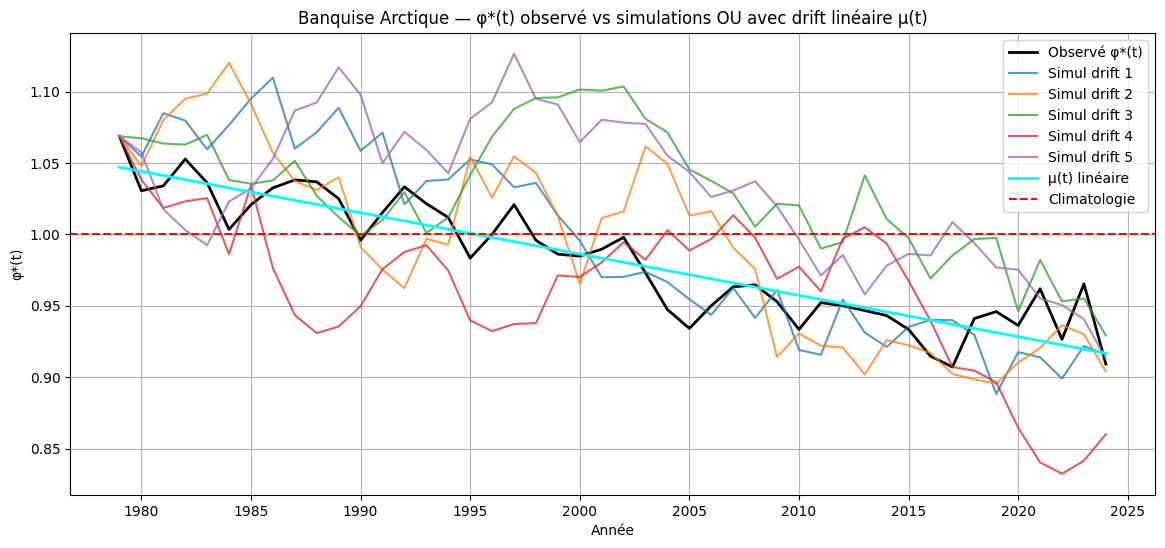

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres (issus de ta régression et recalibration)
mu0 = 1.0470
beta = -0.002895       # par mois
gamma = 0.13
D = 0.00023
dt = 1.0               # 1 mois

# Série observée
phi_obs = monthly["phi_star"].dropna().values
dates = monthly["date"].iloc[:len(phi_obs)]
n_steps = len(phi_obs)
n_sims = 5

# μ(t) linéaire
t = np.arange(n_steps)           # t = 0,1,2,... en mois
mu_t = mu0 + beta * t

# Simulations (Euler-Maruyama avec moyenne mobile)
simulations_drift = []
for s in range(n_sims):
    phi = np.zeros(n_steps)
    phi[0] = phi_obs[0]
    for k in range(1, n_steps):
        phi[k] = phi[k-1] - gamma*(phi[k-1] - mu_t[k])*dt + np.sqrt(2*D*dt)*np.random.randn()
    simulations_drift.append(phi)

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(dates, phi_obs, color="black", linewidth=2, label="Observé φ*(t)")
for i, sim in enumerate(simulations_drift):
    plt.plot(dates, sim, alpha=0.75, label=f"Simul drift {i+1}")
plt.plot(dates, mu_t, color="cyan", linewidth=2, label="μ(t) linéaire")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — φ*(t) observé vs simulations OU avec drift linéaire μ(t)")
plt.xlabel("Année")
plt.ylabel("φ*(t)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def stats_summary(series):
    return {
        "mean": float(np.mean(series)),
        "variance": float(np.var(series)),
        "autocorr_lag1": float(np.corrcoef(series[:-1], series[1:])[0,1])
    }

# Observé
obs_stats = stats_summary(phi_obs)

# Simulé (moyenne sur runs)
sim_stats_list = [stats_summary(sim) for sim in simulations_drift]
sim_stats = {k: float(np.mean([s[k] for s in sim_stats_list])) for k in obs_stats.keys()}

print("=== Observé ===")
print(obs_stats)
print("\n=== Simulé OU + drift (moyenne sur 5 runs) ===")
print(sim_stats)


=== Observé ===
{'mean': 0.9818790327443767, 'variance': 0.0017723564951183694, 'autocorr_lag1': 0.8770952967975183}

=== Simulé OU + drift (moyenne sur 5 runs) ===
{'mean': 1.0017595612938752, 'variance': 0.0031717033559733416, 'autocorr_lag1': 0.9164366482397247}


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Extraire mois et phi*
df = monthly[["date","month","phi_star"]].dropna().copy()
df["t"] = np.arange(len(df))  # index temporel en mois

betas = {}
for m in range(1,13):
    sub = df[df["month"]==m]
    X = sm.add_constant(sub["t"])
    model = sm.OLS(sub["phi_star"], X).fit()
    betas[m] = {"mu0": model.params[0], "beta": model.params[1]}

print("Coefficients saisonniers (par mois):")
for m in betas:
    print(f"Mois {m:02d} → mu0={betas[m]['mu0']:.3f}, beta={betas[m]['beta']:.6f}")


/tmp/ipython-input-3692969119.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[m] = {"mu0": model.params[0], "beta": model.params[1]}


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
betas = {}
for m in range(1, 13):
    sub = df[df["month"] == m]
    if sub.empty:   # <-- éviter les mois sans données
        continue
    X = sm.add_constant(sub["t"].values)
    y = sub["phi_star"].values
    model = sm.OLS(y, X).fit()
    betas[m] = {"mu0": model.params[0], "beta": model.params[1]}


In [ ]:
for m in range(1, 13):
    sub = df[df["month"] == m]
    if len(sub) < 5:   # par ex. au moins 5 points pour estimer une pente
        continue
    ...


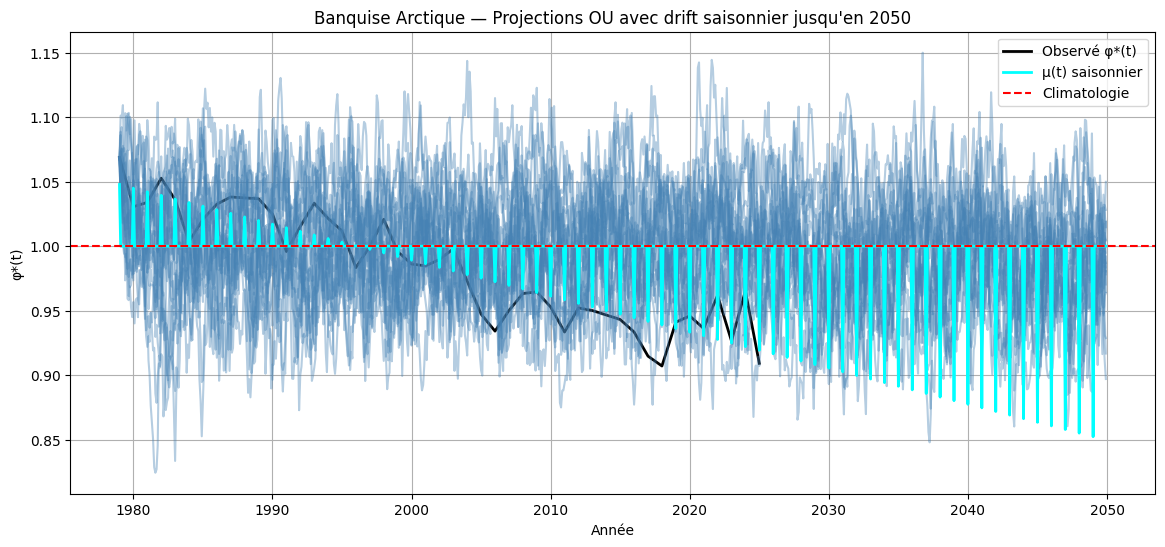

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# On suppose que tu as déjà un DataFrame `monthly` avec colonnes: date, month, phi_star
df = monthly.dropna(subset=["phi_star"]).copy()
df["t"] = (df["date"] - pd.Timestamp("1979-01-01")).dt.days // 30

# Estimation des coefficients saisonniers (mu0, beta) par mois
betas = {}
for m in range(1, 13):
    sub = df[df["month"] == m]
    if len(sub) < 5:
        continue
    X = sm.add_constant(sub["t"].values)
    y = sub["phi_star"].values
    model = sm.OLS(y, X).fit()
    betas[m] = {"mu0": model.params[0], "beta": model.params[1]}

# Paramètres OU
gamma = 0.13
D = 0.00020
n_sims = 20

# Horizon temporel jusqu'à 2050 (~852 mois depuis 1979-01)
n_steps = (2050 - 1979) * 12
t = np.arange(n_steps)
dates = pd.date_range("1979-01-01", periods=n_steps, freq="MS")
months = dates.month

# Calcul de mu(t) saisonnier
mu_t = np.zeros(n_steps)
for k in range(n_steps):
    m = months[k]
    if m in betas:
        mu_t[k] = betas[m]["mu0"] + betas[m]["beta"] * t[k]
    else:
        mu_t[k] = 1.0  # fallback

# Simulations
simulations = []
for s in range(n_sims):
    phi = np.zeros(n_steps)
    phi[0] = df["phi_star"].iloc[0]
    for k in range(1, n_steps):
        phi[k] = phi[k-1] - gamma*(phi[k-1]-mu_t[k]) + np.sqrt(2*D)*np.random.randn()
    simulations.append(phi)

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["phi_star"], color="black", linewidth=2, label="Observé φ*(t)")
for sim in simulations:
    plt.plot(dates, sim, alpha=0.4, color="steelblue")
plt.plot(dates, mu_t, color="cyan", linewidth=2, label="μ(t) saisonnier")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Projections OU avec drift saisonnier jusqu'en 2050")
plt.xlabel("Année")
plt.ylabel("φ*(t)")
plt.legend()
plt.grid(True)
plt.show()


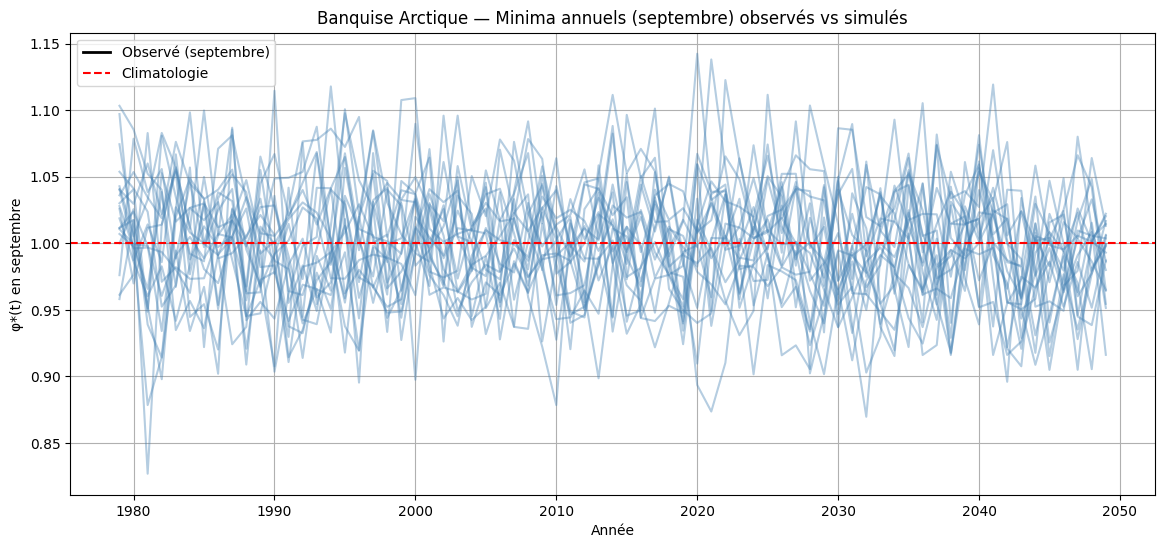

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Observé : minima de septembre
obs_sept = df[df["month"]==9].copy()
obs_sept["year"] = obs_sept["date"].dt.year
obs_sept = obs_sept.groupby("year")["phi_star"].mean()

# Simulé : minima de septembre pour chaque trajectoire
sim_sept = []
for sim in simulations:
    sim_df = pd.DataFrame({"date": dates, "phi": sim})
    sim_df["month"] = sim_df["date"].dt.month
    sim_df["year"] = sim_df["date"].dt.year
    sept = sim_df[sim_df["month"]==9].groupby("year")["phi"].mean()
    sim_sept.append(sept)

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(obs_sept.index, obs_sept.values, color="black", linewidth=2, label="Observé (septembre)")
for sept in sim_sept:
    plt.plot(sept.index, sept.values, alpha=0.4, color="steelblue")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Minima annuels (septembre) observés vs simulés")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Construire un DataFrame pour chaque simulation
sim_sept_threshold = []

for sim in simulations:
    sim_df = pd.DataFrame({"date": dates, "phi": sim})
    sim_df["month"] = sim_df["date"].dt.month
    sim_df["year"] = sim_df["date"].dt.year

    # Moyenne de septembre par année
    sept = sim_df[sim_df["month"]==9].groupby("year")["phi"].mean()

    # Chercher la première année où φ* < 0.5
    below = sept[sept < 0.5]
    if not below.empty:
        sim_sept_threshold.append(below.index[0])
    else:
        sim_sept_threshold.append(None)

# Résumé
years = [y for y in sim_sept_threshold if y is not None]
median_year = np.median(years) if years else None

print("Années de franchissement (φ* < 0.5 en septembre) par simulation :")
print(sim_sept_threshold)
print(f"\nAnnée médiane de franchissement : {median_year}")


Années de franchissement (φ* < 0.5 en septembre) par simulation :
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

Année médiane de franchissement : None


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Extraire uniquement septembre
sept = monthly[monthly["month"]==9].dropna(subset=["phi_star"]).copy()
sept["t"] = (sept["date"] - pd.Timestamp("1979-01-01")).dt.days // 30  # temps en mois

# Construire X = [1, t, t²]
X = np.column_stack([np.ones(len(sept)), sept["t"], sept["t"]**2])
y = sept["phi_star"].values

# Ajustement OLS
model = sm.OLS(y, X).fit()
a, b, c = model.params

print(f"Coefficients quadratiques : a={a:.4f}, b={b:.6f}, c={c:.9f}")

# Courbe ajustée
t_fit = np.linspace(sept["t"].min(), sept["t"].max(), 200)
y_fit = a + b*t_fit + c*t_fit**2
dates_fit = pd.to_datetime("1979-01-01") + pd.to_timedelta(t_fit*30, unit="D")

# Visualisation
plt.figure(figsize=(12,6))
plt.scatter(sept["date"], sept["phi_star"], color="black", label="Observé (septembre)")
plt.plot(dates_fit, y_fit, color="red", linewidth=2, label="Tendance quadratique")
plt.axhline(1.0, color="blue", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Minima de septembre avec tendance quadratique")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
print(monthly.head())
print(monthly.columns)

# Vérifier combien de lignes pour septembre
print("Nombre de lignes septembre :", (monthly["month"]==9).sum())


   year  month  extent  extent-anomaly       date  climatology  phi_star
0  1979      1   15.41            0.99 1979-01-01        14.42  1.068655
1  1980      1   14.86            0.44 1980-01-01        14.42  1.030513
2  1981      1   14.91            0.49 1981-01-01        14.42  1.033981
3  1982      1   15.18            0.76 1982-01-01        14.42  1.052705
4  1983      1   14.94            0.52 1983-01-01        14.42  1.036061
Index(['year', 'month', 'extent', 'extent-anomaly', 'date', 'climatology',
       'phi_star'],
      dtype='object')
Nombre de lignes septembre : 0


Coefficients quadratiques (janvier) : a=1.0545, b=-0.000305, c=0.000000130


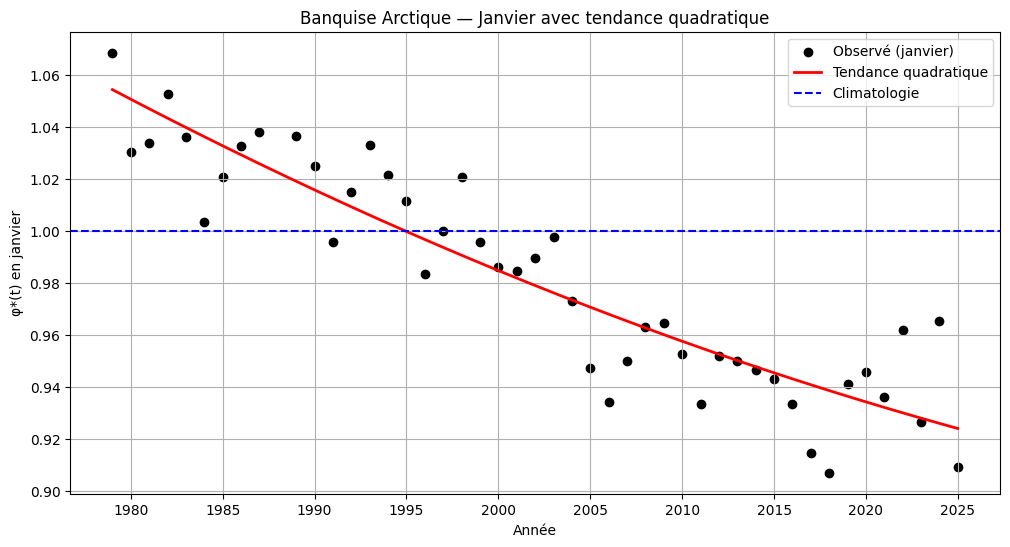

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Extraire janvier
jan = monthly[monthly["month"]==1].dropna(subset=["phi_star"]).copy()
jan["t"] = (pd.to_datetime(jan["date"]) - pd.Timestamp("1979-01-01")).dt.days // 30

# Construire X = [1, t, t²]
t_vals = jan["t"].values
X = np.column_stack([np.ones(len(t_vals)), t_vals, t_vals**2])
y = jan["phi_star"].values

# Ajustement OLS
model = sm.OLS(y, X).fit()
a, b, c = model.params

print(f"Coefficients quadratiques (janvier) : a={a:.4f}, b={b:.6f}, c={c:.9f}")

# Courbe ajustée
t_fit = np.linspace(jan["t"].min(), jan["t"].max(), 200)
y_fit = a + b*t_fit + c*t_fit**2
dates_fit = pd.to_datetime("1979-01-01") + pd.to_timedelta(t_fit*30, unit="D")

# Visualisation
plt.figure(figsize=(12,6))
plt.scatter(jan["date"], jan["phi_star"], color="black", label="Observé (janvier)")
plt.plot(dates_fit, y_fit, color="red", linewidth=2, label="Tendance quadratique")
plt.axhline(1.0, color="blue", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Janvier avec tendance quadratique")
plt.xlabel("Année")
plt.ylabel("φ*(t) en janvier")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Charger septembre (N_09)
sept = pd.read_csv("N_09_extent_v4.0.csv", header=None)

# Vérifier la structure
print(sept.head())

# Selon la version, les colonnes sont souvent :
# [Year, Month, Extent, Missing, Source]
# On renomme pour clarté
sept.columns = ["year", "month", "extent", "missing", "source"]

# Créer une date et un index temporel t (en mois depuis 1979)
sept["date"] = pd.to_datetime(dict(year=sept["year"], month=sept["month"], day=1))
sept["t"] = (sept["date"] - pd.Timestamp("1979-01-01")).dt.days // 30

# Normaliser par la climatologie (par ex. moyenne 1981–2010)
clim = sept[(sept["year"]>=1981)&(sept["year"]<=2010)]["extent"].mean()
sept["phi_star"] = sept["extent"] / clim


      0    1               2        3        4        5
0  year   mo  source_dataset   region   extent     area
1  1979    9      NSIDC-0051        N     7.05     4.58
2  1980    9      NSIDC-0051        N     7.67     4.87
3  1981    9      NSIDC-0051        N     7.14     4.44
4  1982    9      NSIDC-0051        N     7.30     4.43


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [ ]:
# Construire X = [1, t, t²]
t_vals = sept["t"].values
X = np.column_stack([np.ones(len(t_vals)), t_vals, t_vals**2])
y = sept["phi_star"].values

model = sm.OLS(y, X).fit()
a, b, c = model.params

print(f"Coefficients quadratiques (septembre) : a={a:.4f}, b={b:.6f}, c={c:.9f}")

# Courbe ajustée
t_fit = np.linspace(sept["t"].min(), sept["t"].max(), 200)
y_fit = a + b*t_fit + c*t_fit**2
dates_fit = pd.to_datetime("1979-01-01") + pd.to_timedelta(t_fit*30, unit="D")

# Visualisation
plt.figure(figsize=(12,6))
plt.scatter(sept["date"], sept["phi_star"], color="black", label="Observé (septembre)")
plt.plot(dates_fit, y_fit, color="red", linewidth=2, label="Tendance quadratique")
plt.axhline(1.0, color="blue", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Minima de septembre avec tendance quadratique")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 't'

In [ ]:
import pandas as pd

# Charger septembre avec header correct
sept = pd.read_csv("N_09_extent_v4.0.csv", header=0)

print(sept.head())
print(sept.columns)


   year   mo  source_dataset   region   extent     area
0  1979    9      NSIDC-0051        N     7.05     4.58
1  1980    9      NSIDC-0051        N     7.67     4.87
2  1981    9      NSIDC-0051        N     7.14     4.44
3  1982    9      NSIDC-0051        N     7.30     4.43
4  1983    9      NSIDC-0051        N     7.39     4.70
Index(['year', ' mo', 'source_dataset', ' region', ' extent', '   area'], dtype='object')


In [ ]:
# Garder uniquement les colonnes utiles
sept = sept[["year", "mo", "extent", "area"]].copy()

# Créer une colonne date
sept["date"] = pd.to_datetime(dict(year=sept["year"], month=sept["mo"], day=1))

# Index temporel t (en mois depuis 1979-01)
sept["t"] = (sept["date"] - pd.Timestamp("1979-01-01")).dt.days // 30

# Normaliser par la climatologie (exemple : moyenne 1981–2010)
clim = sept[(sept["year"]>=1981)&(sept["year"]<=2010)]["extent"].mean()
sept["phi_star"] = sept["extent"] / clim


KeyError: "['mo', 'extent', 'area'] not in index"

In [ ]:
# Nettoyer les noms de colonnes (supprimer espaces avant/après)
sept.columns = sept.columns.str.strip()

print(sept.columns)
# Tu devrais voir : ['year','mo','source_dataset','region','extent','area']

# Maintenant on peut sélectionner
sept = sept[["year", "mo", "extent", "area"]].copy()


Index(['year', 'mo', 'source_dataset', 'region', 'extent', 'area'], dtype='object')


In [ ]:
# Créer une colonne date
sept["date"] = pd.to_datetime(dict(year=sept["year"], month=sept["mo"], day=1))

# Index temporel t (en mois depuis 1979-01)
sept["t"] = (sept["date"] - pd.Timestamp("1979-01-01")).dt.days // 30

# Normaliser par la climatologie (exemple : moyenne 1981–2010)
clim = sept[(sept["year"]>=1981)&(sept["year"]<=2010)]["extent"].mean()
sept["phi_star"] = sept["extent"] / clim

print(sept.head())


   year  mo  extent  area       date   t  phi_star
0  1979   9    7.05  4.58 1979-09-01   8  1.099272
1  1980   9    7.67  4.87 1980-09-01  20  1.195946
2  1981   9    7.14  4.44 1981-09-01  32  1.113306
3  1982   9    7.30  4.43 1982-09-01  44  1.138254
4  1983   9    7.39  4.70 1983-09-01  56  1.152287


Coefficients quadratiques (septembre) : a=1.1945, b=-0.000955, c=-0.000000033


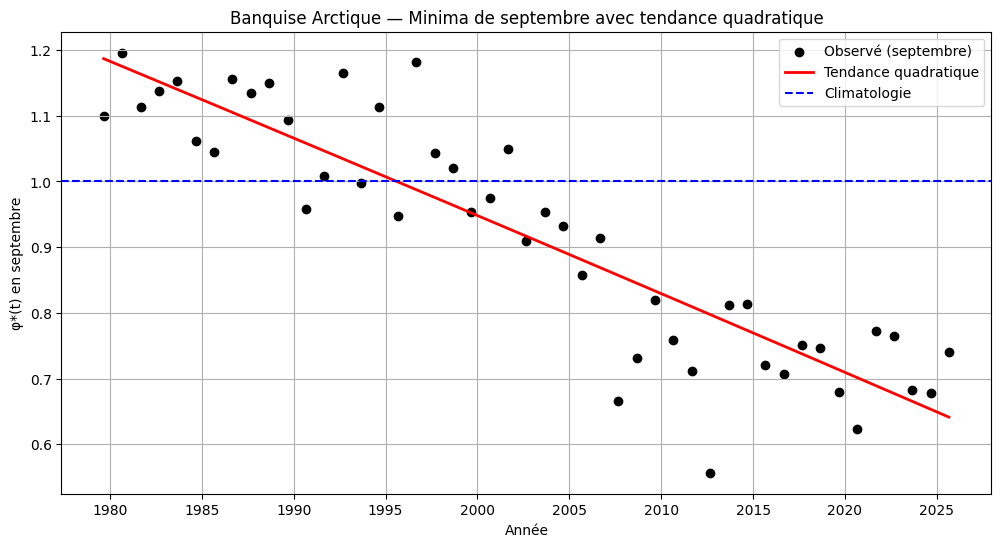

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Construire X = [1, t, t²]
t_vals = sept["t"].values
X = np.column_stack([np.ones(len(t_vals)), t_vals, t_vals**2])
y = sept["phi_star"].values

# Ajustement OLS
model = sm.OLS(y, X).fit()
a, b, c = model.params

print(f"Coefficients quadratiques (septembre) : a={a:.4f}, b={b:.6f}, c={c:.9f}")

# Courbe ajustée
t_fit = np.linspace(sept["t"].min(), sept["t"].max(), 200)
y_fit = a + b*t_fit + c*t_fit**2
dates_fit = pd.to_datetime("1979-01-01") + pd.to_timedelta(t_fit*30, unit="D")

# Visualisation
plt.figure(figsize=(12,6))
plt.scatter(sept["date"], sept["phi_star"], color="black", label="Observé (septembre)")
plt.plot(dates_fit, y_fit, color="red", linewidth=2, label="Tendance quadratique")
plt.axhline(1.0, color="blue", linestyle="--", label="Climatologie")
plt.title("Banquise Arctique — Minima de septembre avec tendance quadratique")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)
plt.show()


Années de franchissement par simulation : [np.int32(2039), np.int32(2032), np.int32(2039), np.int32(2033), np.int32(2035), np.int32(2033), np.int32(2037), np.int32(2039), np.int32(2032), np.int32(2035), np.int32(2035), np.int32(2033), np.int32(2035), np.int32(2035), np.int32(2036), np.int32(2037), np.int32(2034), np.int32(2033), np.int32(2036), np.int32(2033)]
Année médiane : 2035.0


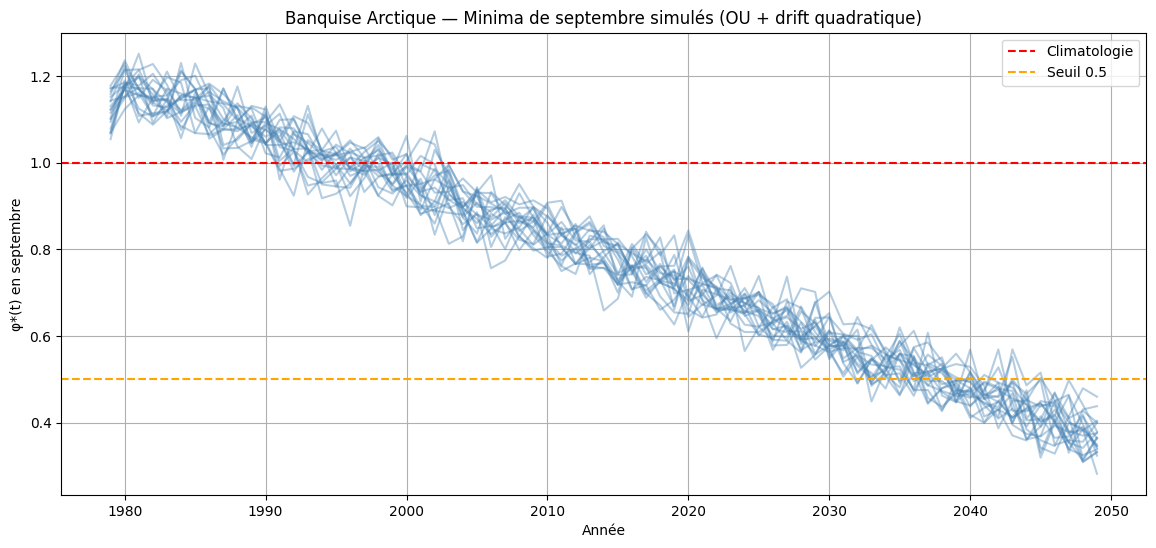

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Coefficients quadratiques (issus de ta régression)
a, b, c = 1.1945, -0.000955, -0.000000033

# Paramètres OU
gamma = 0.13
D = 0.00020
n_sims = 20

# Horizon temporel : 1979–2050 (~852 mois)
n_steps = (2050 - 1979) * 12
t = np.arange(n_steps)
dates = pd.date_range("1979-01-01", periods=n_steps, freq="MS")
months = dates.month
years = dates.year

# Drift quadratique μ(t)
mu_t = a + b*t + c*t**2

# Simulations
simulations = []
for s in range(n_sims):
    phi = np.zeros(n_steps)
    phi[0] = 1.0  # départ normalisé
    for k in range(1, n_steps):
        phi[k] = phi[k-1] - gamma*(phi[k-1]-mu_t[k]) + np.sqrt(2*D)*np.random.randn()
    simulations.append(phi)

# Extraire minima de septembre et franchissement du seuil 0.5
threshold = 0.5
crossing_years = []
sim_sept = []

for sim in simulations:
    sim_df = pd.DataFrame({"date": dates, "phi": sim})
    sim_df["month"] = sim_df["date"].dt.month
    sim_df["year"] = sim_df["date"].dt.year
    sept = sim_df[sim_df["month"]==9].groupby("year")["phi"].mean()
    sim_sept.append(sept)
    below = sept[sept < threshold]
    crossing_years.append(below.index[0] if not below.empty else None)

# Résumé
valid_years = [y for y in crossing_years if y is not None]
median_year = np.median(valid_years) if valid_years else None

print("Années de franchissement par simulation :", crossing_years)
print("Année médiane :", median_year)

# Visualisation
plt.figure(figsize=(14,6))
for sept in sim_sept:
    plt.plot(sept.index, sept.values, alpha=0.4, color="steelblue")
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.axhline(0.5, color="orange", linestyle="--", label="Seuil 0.5")
plt.title("Banquise Arctique — Minima de septembre simulés (OU + drift quadratique)")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose que tu as déjà :
# - sept (observations historiques, colonnes ['date','phi_star'])
# - sim_sept (liste de Series, chaque Series = trajectoire simulée de septembre)
# - crossing_years (liste des années de franchissement par simulation)
# - median_year (année médiane)

plt.figure(figsize=(14,7))

# 1. Observations historiques
plt.scatter(sept["date"], sept["phi_star"], color="black", label="Observé (septembre)")

# 2. Trajectoires simulées
for s in sim_sept:
    plt.plot(s.index, s.values, alpha=0.4, color="steelblue")

# 3. Seuils
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.axhline(0.5, color="orange", linestyle="--", label="Seuil critique 0.5")

plt.title("Banquise Arctique — Synthèse septembre (observations + simulations OU quadratique)")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)

# 4. Inset : histogramme des années de franchissement
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(plt.gca(), width="35%", height="35%", loc="upper right")

valid_years = [int(y) for y in crossing_years if y is not None]
sns.histplot(valid_years, bins=range(min(valid_years), max(valid_years)+1), ax=ax_inset, color="skyblue", edgecolor="black")
ax_inset.axvline(median_year, color="red", linestyle="--", label=f"Médiane {int(median_year)}")
ax_inset.set_title("Distribution des franchissements")
ax_inset.set_xlabel("Année")
ax_inset.set_ylabel("Fréquence")
ax_inset.legend()

plt.show()


KeyError: 'date'

<Figure size 1400x700 with 0 Axes>

In [ ]:
# Recréer la colonne date si elle a disparu
if "date" not in sept.columns:
    sept["date"] = pd.to_datetime(dict(year=sept["year"], month=sept["mo"], day=1))


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
type(sept)
print(sept.head())


year
1979    1.069121
1980    1.123325
1981    1.155427
1982    1.147520
1983    1.197326
Name: phi, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(14,7))

# 1. Observations historiques
plt.scatter(sept["date"], sept["phi_star"], color="black", label="Observé (septembre)")

# 2. Trajectoires simulées (Series indexées par année)
for s in sim_sept:
    plt.plot(s.index, s.values, alpha=0.4, color="steelblue")

# 3. Seuils
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.axhline(0.5, color="orange", linestyle="--", label="Seuil critique 0.5")

plt.title("Banquise Arctique — Synthèse septembre (observations + simulations OU quadratique)")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)

# 4. Inset : histogramme des années de franchissement
valid_years = [int(y) for y in crossing_years if y is not None]
median_year = int(np.median(valid_years))

ax_inset = inset_axes(plt.gca(), width="35%", height="35%", loc="upper right")
sns.histplot(valid_years, bins=range(min(valid_years), max(valid_years)+1),
             ax=ax_inset, color="skyblue", edgecolor="black")
ax_inset.axvline(median_year, color="red", linestyle="--", label=f"Médiane {median_year}")
ax_inset.set_title("Distribution des franchissements")
ax_inset.set_xlabel("Année")
ax_inset.set_ylabel("Fréquence")
ax_inset.legend()

plt.show()


KeyError: 'date'

<Figure size 1400x700 with 0 Axes>

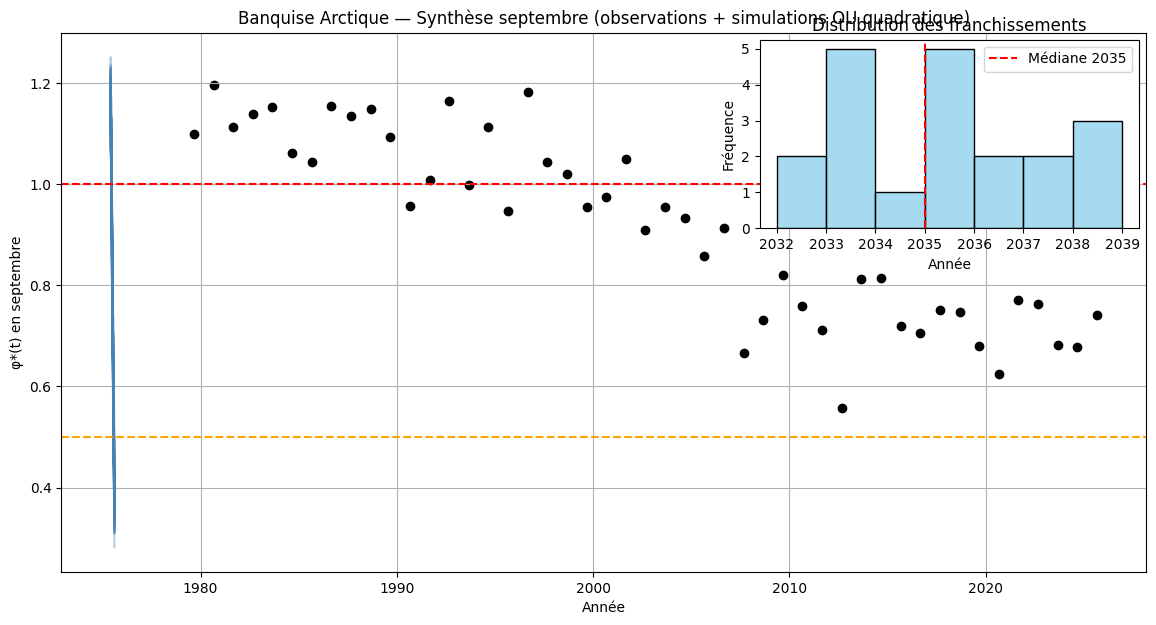

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# --- Observations (reconstruites proprement) ---
sept_obs = pd.read_csv("N_09_extent_v4.0.csv", header=0)
sept_obs.columns = sept_obs.columns.str.strip()
sept_obs = sept_obs[["year", "mo", "extent", "area"]].copy()
sept_obs["date"] = pd.to_datetime(dict(year=sept_obs["year"], month=sept_obs["mo"], day=1))
clim = sept_obs[(sept_obs["year"]>=1981)&(sept_obs["year"]<=2010)]["extent"].mean()
sept_obs["phi_star"] = sept_obs["extent"] / clim

# --- Figure principale ---
plt.figure(figsize=(14,7))

# 1. Observations historiques
plt.scatter(sept_obs["date"], sept_obs["phi_star"], color="black", label="Observé (septembre)")

# 2. Trajectoires simulées (Series indexées par année)
for s in sim_sept:
    plt.plot(s.index, s.values, alpha=0.4, color="steelblue")

# 3. Seuils
plt.axhline(1.0, color="red", linestyle="--", label="Climatologie")
plt.axhline(0.5, color="orange", linestyle="--", label="Seuil critique 0.5")

plt.title("Banquise Arctique — Synthèse septembre (observations + simulations OU quadratique)")
plt.xlabel("Année")
plt.ylabel("φ*(t) en septembre")
plt.legend()
plt.grid(True)

# 4. Inset : histogramme des années de franchissement
valid_years = [int(y) for y in crossing_years if y is not None]
median_year = int(np.median(valid_years))

ax_inset = inset_axes(plt.gca(), width="35%", height="35%", loc="upper right")
sns.histplot(valid_years, bins=range(min(valid_years), max(valid_years)+1),
             ax=ax_inset, color="skyblue", edgecolor="black")
ax_inset.axvline(median_year, color="red", linestyle="--", label=f"Médiane {median_year}")
ax_inset.set_title("Distribution des franchissements")
ax_inset.set_xlabel("Année")
ax_inset.set_ylabel("Fréquence")
ax_inset.legend()

plt.show()
